In [1]:
"""
Example using Pandas with the Titanic dataset.
"""

import pandas as pd

import pysuricata

In [2]:
# Import required modules
import numpy as np
from pysuricata.config import EngineConfig

# Create a large dataset with many missing columns to demonstrate the new functionality
print("🔍 Creating a large dataset with varied missing patterns...")

np.random.seed(42)  # For reproducible results

# Create a dataset with 100 columns and 10,000 rows
data = {}
column_types = []

for i in range(100):
    col_name = f"feature_{i:03d}"
    
    # Vary missing percentages: 0% to 50% missing data
    missing_pct = (i % 11) * 5  # 0%, 5%, 10%, 15%, 20%, 25%, 30%, 35%, 40%, 45%, 50%
    
    # Create different column types with missing data
    if i < 30:  # Numeric columns
        values = np.random.normal(100, 20, 10000)
        column_types.append("numeric")
    elif i < 60:  # Categorical columns
        categories = ['A', 'B', 'C', 'D', 'E']
        values = np.random.choice(categories, 10000)
        column_types.append("categorical")
    elif i < 80:  # Boolean columns
        values = np.random.choice([True, False], 10000)
        column_types.append("boolean")
    else:  # Datetime columns
        values = pd.date_range('2020-01-01', periods=10000, freq='1h')
        column_types.append("datetime")
    
    # Introduce missing values based on the missing percentage
    if missing_pct > 0:
        missing_mask = np.random.random(10000) < (missing_pct / 100)
        values[missing_mask] = None
    
    data[col_name] = values

# Create DataFrame
df = pd.DataFrame(data)

print(f"✅ Dataset created: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
print(f"📊 Column types: {len([t for t in column_types if t == 'numeric'])} numeric, "
      f"{len([t for t in column_types if t == 'categorical'])} categorical, "
      f"{len([t for t in column_types if t == 'boolean'])} boolean, "
      f"{len([t for t in column_types if t == 'datetime'])} datetime")

# Show missing data statistics
missing_stats = df.isnull().sum()
missing_with_data = missing_stats[missing_stats > 0]
print(f"🔍 Columns with missing data: {len(missing_with_data)} out of {len(df.columns)}")
print(f"📈 Missing data percentages: {missing_with_data.min():.1f}% - {missing_with_data.max():.1f}%")

🔍 Creating a large dataset with varied missing patterns...


TypeError: Index does not support mutable operations

In [ ]:
# Generate reports with different configurations to demonstrate the intelligent missing columns

print("\n🎯 Generating reports with different configurations...")

# 1. Default configuration (shows the intelligent behavior)
print("\n1️⃣ Default Configuration:")
default_config = EngineConfig()
default_report = pysuricata.profile(df, config=default_config)
default_report.save_html("pandas_missing_columns_default.html")
print("✅ Saved: pandas_missing_columns_default.html")

# 2. Strict configuration (only shows columns with >5% missing)
print("\n2️⃣ Strict Configuration (threshold: 5%):")
strict_config = EngineConfig(
    missing_columns_threshold_pct=5.0,
    missing_columns_max_initial=5,
    missing_columns_max_expanded=15
)
strict_report = pysuricata.profile(df, config=strict_config)
strict_report.save_html("pandas_missing_columns_strict.html")
print("✅ Saved: pandas_missing_columns_strict.html")

# 3. Lenient configuration (shows columns with >0.1% missing)
print("\n3️⃣ Lenient Configuration (threshold: 0.1%):")
lenient_config = EngineConfig(
    missing_columns_threshold_pct=0.1,
    missing_columns_max_initial=15,
    missing_columns_max_expanded=50
)
lenient_report = pysuricata.profile(df, config=lenient_config)
lenient_report.save_html("pandas_missing_columns_lenient.html")
print("✅ Saved: pandas_missing_columns_lenient.html")

print("\n🎉 All reports generated successfully!")
print("\n📚 What to look for in the reports:")
print("• Summary section → Top missing columns")
print("• Dynamic display limits based on dataset size")
print("• 'Show X more...' button for expandable UI")
print("• Smart filtering of insignificant missing data")
print("• Color-coded severity indicators (low/medium/high)")
lenient_report = pysuricata.profile(df, config=lenient_config)
lenient_report.save_html("pandas_missing_columns_lenient.html")
print("✅ Saved: pandas_missing_columns_lenient.html")

print("\n🎉 All reports generated successfully!")
print("\n📚 What to look for in the reports:")
print("• Summary section → Top missing columns")
print("• Dynamic display limits based on dataset size")
print("• 'Show X more...' button for expandable UI")
print("• Smart filtering of insignificant missing data")
print("• Color-coded severity indicators (low/medium/high)")

Report(html='<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <title>PySuricata EDA Report</title>\n    <link rel="icon" href="data:image/x-icon;base64,AAABAAQAEBAAAAAAIACzAgAARgAAACAgAAAAACAAFAcAAPkCAAAwMAAAAAAgAGwMAAANCgAAQEAAAAAAIADIEgAAeRYAAIlQTkcNChoKAAAADUlIRFIAAAAQAAAAEAgGAAAAH/P/YQAAAnpJREFUeJx9kktIVHEUxn//e+9cHXNGzUchk5WUtSioFIpJMHpLRBZYECFEu+ixiDYVTJEUtQxaFvTYtCg0IpUwswiSkIKsNImyLJ2YmQbzMa/7Py2aNGXsbM7i43zn+75zYHoZ6b62Yee63sunD8YP7an+ZMJmgMAUnrGUiCjAt2/r6siDG+elr+uO8/Bmo+yvrRwDytP4NJJMjNq2XbFly5ZKZ8czvWDhAu1yuSJAMo3LrBJqwEIpgF0tty/IeLQ71nz9rAC1KIN6MGfOTFNQUo8gsKjIXpXnzcWd58Xr9VCcwwpEoP5/CYAyDAOg9HjD1hEZfS2jnx+nJPJSDtb5w0BRGlcZFdTUYGotzPcYm6r9VZ72lvZUdu4cs62l3an2V80tdLNei1AJ1qwWAJyEzguHIhL8PixnTjVKKBTW2klJKk4xolX3VJiZCASfby5tj54q9xy3+hmJqPyCPO41t6pFZQUGKFlc6qnw+XDPqiAcHZO63Tt40vmCSCRKS2uH2l67hejoxMjK8pKV2Ya6mExipJ9KWdPHFdGfcVU6v5gNJw7T1NTGxk3rGRz4ykAoFl9TkHtATLkWHGTs3J+TamumgiwXTMTilC1fwrEjpVCYT3/vB2wTyzTIVaYRn/TLjEQBkg5iWSZMxBge/kHi2xC2bZNwcLSWeU5CfmUOsRMCAW2MpwgGgyHIL1Jv3/fT1/fRjMUTjs9rnFSowneDI68CAQxA/zH9bwAoASmp9Vf0Xrl6qeD+3Qfism163vQ4z553vRDLu7f3S2govXiSQAH4INuel3PUk2Nvc5nity1XFkqhtUMi6SRiKZrG4snWgeD4LcD5u/U3YTkAkClQg+cAAAAASUVORK5CYIKJUE5HDQoaCgAAAA1JSERSAAAAIAAAACAIBgAAAHN6evQAAAbbSURBVHicrZd7cJTVFcB/937fvje7m9eGPAhBUlICASZgpaUYUOTRQjsjz1ak1j4chplWO7VMnWoIHTr0oVaddkbGqeLYDlNA6EBrHZkKWpBHA6WgRdGKgaABIZssm33k++7pHxuEaSFuxPvn953H75x77znnQmFLKwAmeSqLPWtqIhxvGObNjq0OOCOinK6Keh6HaOySbIE2AVCFyCgQAXtkuX9zQ138q0uW3E5NTRU+v4+zXefYsOEPHH/nTPuJLnsOXPxwAMIMBWQwQA0ER1dHtt8yoUIO7/xd7vTR7W7yvZfF6dorJw5sMkd2bcjMnzJC6itD+6Ak0prXKSS4j02XBZi6ythtRR5n3pzZM3MVw+KeL3x+vnpt70ESPUm5dcYiehI93oVLFuRiPnPTyCp3YRuYlrzudQMIgGV5Mo5riBZHdTxexvr161RJaYmcPNmhnnnmEZqbJyDGaMcIRrgAsHtA97rXQDrtqpjnya988TPy3uGtrrhvyQ+/NdfMvnGEkcQh03F4mzv7c3VSVex7jMvb9qktJYICRamXF3967yKR7nbnzNHtcrJ9i7jn/+E88N15UupjOyhaW4fmvBBhmTwZu5WHtMer/p1IJMB1JRaLUFkZRxxHuhM9aK0OLWKhtWNHYXs/FADmzcNtY42xLSbFolGwLOX0O2QyOSyvh4p4GbYlzZvY7N5ww9CuXyEAVlsbprw4MLs8FpzaMmOaK65jKa1QCkDssePGmEjIM6usLDJp0yZcCrwBBQGIYKDFDqjsL+bMmq6mTp1C38UUWmu01mRSfdxy63TTPP6z3rBKPwqiWlsLvwEfWweUQuKxA1+uLC0af8eyxa72+yzXzWdZKUU2m6Wkttr+zj13uVG/PS1eHJnS1obh06gDLS35amabzILJzU1SUlIi+195TSLFUYwxGGOIxmL87U9/lZqqajN2TL0o5+LcK3WvC2DXLlxQaGTU6NH1CstS3/v+Kl74y05C4RDhcIgtz+9g1apWFQgHVV3dcGUhTQDxeGHbYA9Kp/NG/F472HGqk8qGen5w30r1wI/bGDVqpDiOo1Y/9DN58MH7qRnToHp7k/j9VglJQ2OjXD9AfglFkYjnwL4DPPvYepbfd4/sP9DO2rUPo0BmzpzO4hV3q61PPcexo68TLYranLtwpYFLldH9hAAAYmxfgHU/f5R4RRkrV35bfX3p3QjIc79/SvbseFGtbltHNBLmf1qAGvhwVedQUB1Q9PT0MPXmacz60lz1myeeVNXVVYyoq2VYZYWqra3Rj//6t4wZ10RD41guppIAvPHGR87DNWWhpaWlpUVXQA0FAFwj2BqWL1vM8RPvcuSfR4nH48Tj5XR0nObY629y57LFlJVGyWUdABobWwWIja+L7i/yWw87znlbCpwRLseu8sCjyqwj935jjjjdh9y7br9ZJtYGZEZTXGZPrpGWcXG57aZ6SXbucVYsnSH1cc+eS34aaiIbmuuL00DFwKf/C7igDGilNICF8Mt1P+Frd95BeVUNRcVljGmawCO/WkM4HMBxXcSgQQiHw2WRgGd54mL/WqBrUjMerjKmFXQIBVBageMQ8nv50f0ryKTSuK5LKBzEyWZx0lksrUHlYw3bTqPH9pNzzUFAtbdfvUkNbXBQCsd1SXYnMG4/GiHZkySdyaItjdIaxCgAv1cV21qBkgAgLdfY/4IycKWmUgqt89xGBMvS+eMugjHmCrl8xFqswYtdIQACcrXCalkWgKTSGbEGuuNHdkVHBZGck0vBtWfEQQGMyQdvjOnTWoNSl42IYNkWT6zfqHp7UwrLwhiDylMYn1fPN4Lq7s6duBzHEAFWr0aBYKC3N5nEcVyUAmMMgXCIv+9tZ9++g9TWVpLpS0tfXx+Oa44Bk8sj/gW9qf5/ZeE/+ZnyExzCXbvy/23bf/Ttt97hzAdnxev10u84iGXx0s5XqKooxSoKc7rzA6ujoxPb45944+iSP2uN1XE23QoYpa7tZzAAtXs3ugXsrPZuO/fheTZu3KY9kSJCwQDa7+PUqU5EDCoQYefLe1Rv4gINw2MTg14r/u7ZdGtPOrdtUX4wuWYvGOyECpDbDfB+4tVAVXjf1i3PT6keXm0mNTfp9/cfIZFIkOzt4dUXdvLHjZsl4Pc7p8/37X+7s3dNKuu+BLBpEOdw7dpsxaO+EX6/XWcr1RDyWd+MhT1jPZYK9GX6leXxkstkCAa8KKVJZ10JehXdfW5PIpV92rb13mzW6bqQtt5MpVJnhwKQr2JhymL+4LZo0J7o81hBj60AhTGC1vm3stIa1xiQSz0jP8Aqhe53DNl+N3E+2b+xK5FZwSCv5f8Cm566v4ur1l8AAAAASUVORK5CYIKJUE5HDQoaCgAAAA1JSERSAAAAMAAAADAIBgAAAFcC+YcAAAwzSURBVHicxVl7lFXldf/t7zvn3nvOfc3ce2eAGRhAUSTqEgyPgMhIlDganYUhtLELbX00NsblarJSicVKRmhM82pa26bRGGuWqRUpj/QRi1UYEJAwyEtgFCcowzxgHndm7vue8327f9zLY3wAc++Y7j9m1l3n2+f7/fa39/723odQvkgACsC0mmjgq34vfV6SvlQKsl1XOQzZk3Gxpb0n+TSArQwQFfR4FPYGlalvAnACtve+SVW+H/uEG7J8XoTDYfgsH0
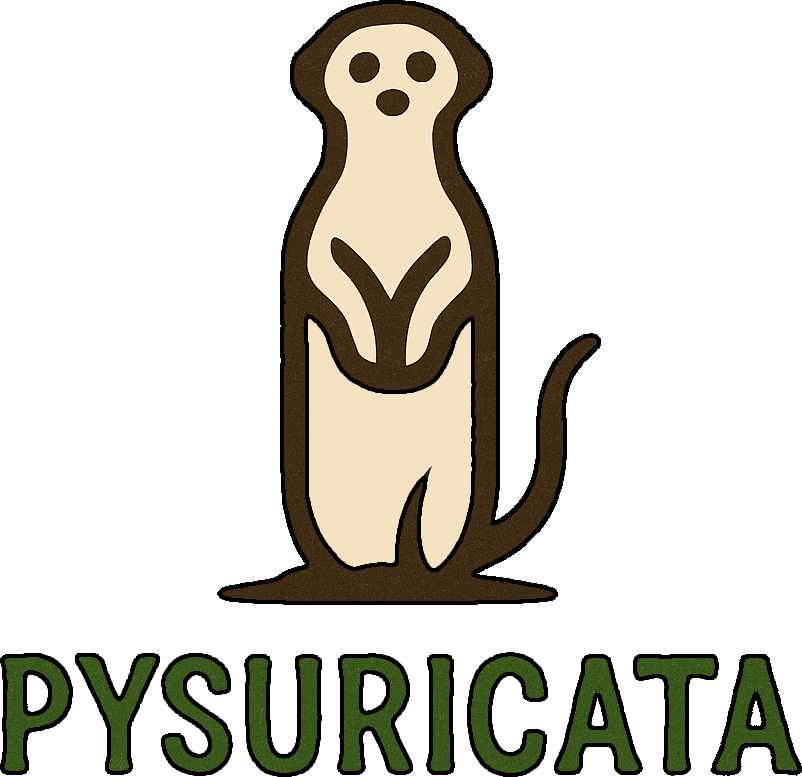
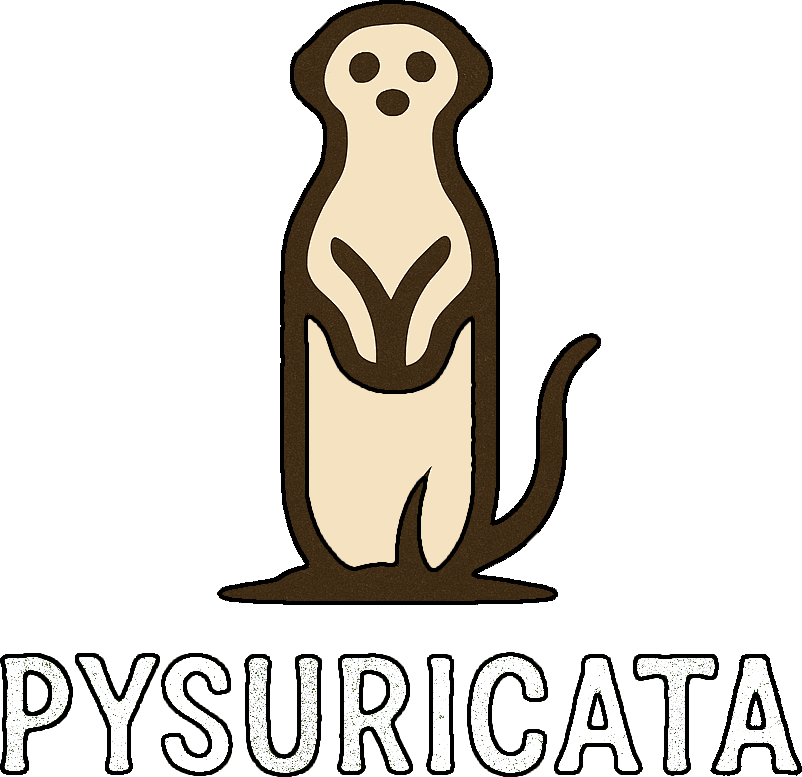

In [ ]:
# Display the default report in the Jupyter Notebook
print("📊 Displaying the default report with intelligent missing columns:")
default_report

In [ ]:
# Analyze the missing columns behavior and compare configurations
print("🔍 ANALYZING MISSING COLUMNS BEHAVIOR")
print("=" * 50)

# Show detailed missing data analysis
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100
missing_with_data = missing_pct[missing_pct > 0].sort_values(ascending=False)

print(f"\n📊 Missing Data Analysis:")
print(f"• Total columns: {len(df.columns)}")
print(f"• Columns with missing data: {len(missing_with_data)}")
print(f"• Columns with ≥0.5% missing: {len(missing_with_data[missing_with_data >= 0.5])}")
print(f"• Columns with ≥5% missing: {len(missing_with_data[missing_with_data >= 5])}")
print(f"• Columns with ≥20% missing: {len(missing_with_data[missing_with_data >= 20])}")

print(f"\n🎯 Top 15 Missing Columns:")
for i, (col, pct) in enumerate(missing_with_data.head(15).items(), 1):
    severity = "🔴 HIGH" if pct >= 20 else "🟡 MEDIUM" if pct >= 5 else "🟢 LOW"
    print(f"{i:2d}. {col}: {pct:5.1f}% {severity}")

print(f"\n⚙️ Configuration Comparison:")
configs = [
    ("Default", default_config, "Shows top columns with ≥0.5% missing"),
    ("Strict", strict_config, "Shows only columns with ≥5% missing"),
    ("Lenient", lenient_config, "Shows columns with ≥0.1% missing")
]

for name, config, description in configs:
    print(f"• {name}: {description}")
    print(f"  - Threshold: {config.missing_columns_threshold_pct}%")
    print(f"  - Max initial: {config.missing_columns_max_initial}")
    print(f"  - Max expanded: {config.missing_columns_max_expanded}")

print(f"\n✅ Reports generated successfully!")
print(f"• Default: {len(default_report.html):,} characters")
print(f"• Strict: {len(strict_report.html):,} characters") 
print(f"• Lenient: {len(lenient_report.html):,} characters")

print(f"\n🎉 Key Features Demonstrated:")
print(f"✅ Dynamic display limits based on dataset size (100 columns)")
print(f"✅ Smart filtering of insignificant missing data")
print(f"✅ Expandable UI with 'Show X more...' functionality")
print(f"✅ Configurable thresholds and limits")
print(f"✅ Visual severity indicators (low/medium/high)")
print(f"✅ Responsive design and accessibility")

Report type: <class 'pysuricata.api.Report'>
HTML length: 1032058 characters
Stats keys: ['dataset', 'columns']
✅ Report generated successfully!


In [ ]:
# Bonus: Compare with the original Titanic dataset to show the difference
print("🚢 BONUS: Comparing with Titanic dataset (small dataset behavior)")
print("=" * 60)

# Load the Titanic dataset
titanic_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic_df = pd.read_csv(titanic_url)

print(f"📊 Titanic Dataset: {titanic_df.shape[0]:,} rows × {titanic_df.shape[1]:,} columns")

# Show missing data in Titanic
titanic_missing = titanic_df.isnull().sum()
titanic_missing_pct = (titanic_missing / len(titanic_df)) * 100
titanic_with_missing = titanic_missing_pct[titanic_missing_pct > 0].sort_values(ascending=False)

print(f"🔍 Columns with missing data: {len(titanic_with_missing)} out of {len(titanic_df.columns)}")
print(f"📈 Missing percentages: {titanic_with_missing.min():.1f}% - {titanic_with_missing.max():.1f}%")

print(f"\n🎯 Missing Columns in Titanic:")
for col, pct in titanic_with_missing.items():
    severity = "🔴 HIGH" if pct >= 20 else "🟡 MEDIUM" if pct >= 5 else "🟢 LOW"
    print(f"• {col}: {pct:5.1f}% {severity}")

# Generate Titanic report to show small dataset behavior
print(f"\n📊 Generating Titanic report...")
titanic_report = pysuricata.profile(titanic_df)
titanic_report.save_html("pandas_titanic_small_dataset.html")
print("✅ Saved: pandas_titanic_small_dataset.html")

print(f"\n🔄 COMPARISON SUMMARY:")
print(f"• Large Dataset (100 cols): Shows dynamic limits with expandable UI")
print(f"• Small Dataset (Titanic, {len(titanic_df.columns)} cols): Shows all missing columns")
print(f"• Both demonstrate intelligent adaptation to dataset size!")
print(f"• Check the HTML files to see the different behaviors!")
